In [1]:
import requests
import seaborn as sns
import pandas as pd
import numpy as np


league_id = 1535095
year = 2020
url = "https://fantasy.espn.com/apis/v3/games/ffl/leagueHistory/" + \
      str(league_id) + "?seasonId=" + str(year)

leagueInfo_r = requests.get(url)
leagueInfo_json = leagueInfo_r.json()[0]
leagueInfo_json

{'gameId': 1,
 'id': 1535095,
 'members': [{'displayName': 'Deviance63',
   'id': '{2CABDCE3-8236-41FD-ABDC-E3823601FD5A}',
   'isLeagueManager': False},
  {'displayName': 'nicholaspearson',
   'id': '{36B31274-CD18-4C16-A589-1C45981FED31}',
   'isLeagueManager': False},
  {'displayName': 'russellw4210',
   'id': '{5164B056-DA15-4BEA-AC8B-59E5B9177252}',
   'isLeagueManager': False},
  {'displayName': 'charle3632598',
   'id': '{56D33326-3072-4054-AFF0-DE8A82EB4C85}',
   'isLeagueManager': False},
  {'displayName': 'Jake Hansen5',
   'id': '{80DFBD38-066F-4802-9583-BB0D95465B47}',
   'isLeagueManager': False},
  {'displayName': 'ESPNFAN8981231100',
   'id': '{C2645832-C164-42DD-9741-3325ED8FEA2B}',
   'isLeagueManager': False},
  {'displayName': 'thebenak',
   'id': '{C705CCCF-2963-4329-BB47-A43F44DA29F6}',
   'isLeagueManager': False},
  {'displayName': 'ESPNfan9110406897',
   'id': '{C7E3F6F6-9C4C-4825-AC13-22CD8EA0DB59}',
   'isLeagueManager': False},
  {'displayName': 'Bears8309',


In [2]:
#get teams and ids to join up on later
teams_df = pd.DataFrame(leagueInfo_json['teams'])
teams_df['teamName'] = teams_df['location'] + ' ' + teams_df['nickname']
teams_df.drop(['abbrev', 'location', 'nickname', 'owners'], axis = 1, inplace = True)
teams_df

,id,teamName
0,1,Team Brockman
1,2,Team Hansen
2,4,Team Shapland
3,7,Team Benak
4,8,Team pearson
5,9,Run It Back
6,10,Team Smith
7,11,Wyld Stallyns
8,12,Team Burtwistle
9,13,Team Stroudy


In [3]:
## using a view lets us see different stuff
mMatchup_r = requests.get(url, params={"view": "mMatchup"})
mMatchup_json = mMatchup_r.json()[0]
mMatchup_json

# /***
# Some other views to explore are (non-exhaustive list):

# mTeam
# mBoxscore
# mRoster
# mSettings
# kona_player_info
# player_wl
# mSchedule
# ***/

{'draftDetail': {'drafted': True, 'inProgress': False},
 'gameId': 1,
 'id': 1535095,
 'schedule': [{'away': {'cumulativeScore': {'losses': 0,
     'scoreByStat': {'101': {'ineligible': False,
       'rank': 0.0,
       'result': None,
       'score': 0.0},
      '102': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '103': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '104': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '106': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '117': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 1.0},
      '119': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '123': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '124': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '125': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '128': {'ineligible': Fal

In [4]:
schedule_df = pd.DataFrame(columns=['Week', 'homeTeam', 'homeScore', 'awayTeam', 'awayScore'])

for game in mMatchup_json['schedule']:

    
    try:
        schedule_df = schedule_df.append({'Week': game['matchupPeriodId']
                       ,'homeTeam': game['home']['teamId']
                       ,'homeScore': game['home']['totalPoints']
                       ,'awayTeam': game['away']['teamId']
                       ,'awayScore': game['away']['totalPoints']}, ignore_index=True)
    #getting keyErrors when a team has a bye.. for now just skip them
    except:
        pass


schedule_df

,Week,homeTeam,homeScore,awayTeam,awayScore
0,1.0,1.0,94.98,14.0,102.72
1,1.0,4.0,81.90,2.0,88.74
2,1.0,15.0,114.26,13.0,128.60
3,1.0,10.0,131.00,12.0,136.40
4,1.0,8.0,55.90,7.0,114.88
5,1.0,11.0,122.82,9.0,153.34
6,2.0,14.0,136.50,2.0,140.48
7,2.0,13.0,107.28,1.0,111.40
8,2.0,15.0,87.88,4.0,137.42
9,2.0,12.0,158.04,7.0,116.22


In [5]:
schedule_df['Type'] = ['Regular' if w<=14 else 'Playoff' for w in schedule_df['Week']]
schedule_df.head()

,Week,homeTeam,homeScore,awayTeam,awayScore,Type
0,1.0,1.0,94.98,14.0,102.72,Regular
1,1.0,4.0,81.90,2.0,88.74,Regular
2,1.0,15.0,114.26,13.0,128.60,Regular
3,1.0,10.0,131.00,12.0,136.40,Regular
4,1.0,8.0,55.90,7.0,114.88,Regular


In [6]:
schedule_df['homeMargin'] = schedule_df['homeScore'] - schedule_df['awayScore']
schedule_df['awayMargin'] = schedule_df['awayScore'] - schedule_df['homeScore']
homeTeam_df = schedule_df[['Week',
                           'homeTeam',
                           'homeScore',
                           'Type',
                           'homeMargin']].rename(columns = {'homeTeam': 'team',
                                                           'homeScore': 'score',
                                                           'homeMargin': 'margin'})
awayTeam_df = schedule_df[['Week',
                           'awayTeam',
                           'awayScore',
                           'Type',
                           'awayMargin']].rename(columns = {'awayTeam': 'team',
                                                           'awayScore': 'score',
                                                           'awayMargin': 'margin'})

matchups_df = pd.concat([homeTeam_df, awayTeam_df])
matchups_df = matchups_df.merge(teams_df, left_on = 'team', right_on = 'id').drop(['team', 'id'], axis = 1)
matchups_df

,Week,score,Type,margin,teamName
0,1.0,94.98,Regular,-7.74,Team Brockman
1,3.0,124.74,Regular,-13.18,Team Brockman
2,4.0,98.92,Regular,4.48,Team Brockman
3,6.0,96.38,Regular,14.14,Team Brockman
4,8.0,92.96,Regular,50.44,Team Brockman
5,10.0,95.96,Regular,15.18,Team Brockman
6,14.0,58.72,Regular,-49.40,Team Brockman
7,15.0,89.36,Playoff,1.54,Team Brockman
8,16.0,57.10,Playoff,-84.22,Team Brockman
9,2.0,111.40,Regular,4.12,Team Brockman


In [7]:
matchups_df.groupby('teamName').agg({'margin': 'mean'}).sort_values(by = 'margin', ascending = False)

,margin
teamName,
Team Burtwistle,13.602667
Team Benak,13.361250
I’m Shucked,10.694667
Team Shapland,6.070000
Team Stroudy,5.456250
Team Schram,4.501250
Run It Back,3.723750
Team Hansen,3.027500
Wyld Stallyns,-3.565000


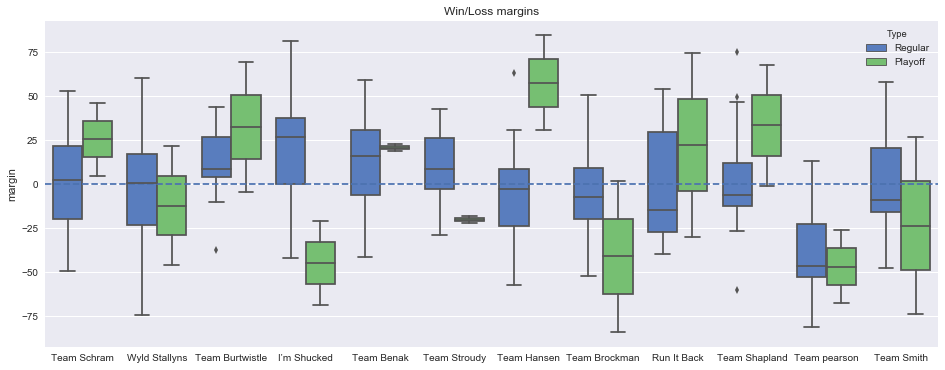

In [8]:
import matplotlib.pyplot as plt

#need to figure out a way to order dynamically, right now just manually entering
order = ['Team Schram',
         'Wyld Stallyns',
         'Team Burtwistle',
         'I’m Shucked', 
         'Team Benak',
         'Team Stroudy',
         'Team Hansen',
         'Team Brockman',
         'Run It Back',
         'Team Shapland',
         'Team pearson',        
         'Team Smith']

fig, ax = plt.subplots(1,1, figsize=(16,6))

sns.boxplot(x='teamName', y='margin', hue='Type',
            data=matchups_df,
            palette='muted',
            order=order)
ax.axhline(0, ls='--')
ax.set_xlabel('')
ax.set_title('Win/Loss margins')
plt.show()

In [9]:
regularSeason_df = matchups_df[matchups_df['Type'] == 'Regular'].copy()

regularSeason_df['weeklyRank'] = regularSeason_df.groupby('Week')['score'].rank(method='first')
regularSeason_df['weeklyWin'] = np.where(regularSeason_df['margin'] > 0, 1, 0)

regularSeason_df.sort_values(by = ['Week', 'weeklyRank'])

,Week,score,Type,margin,teamName,weeklyRank,weeklyWin
64,1.0,55.90,Regular,-58.98,Team pearson,1.0,0
16,1.0,81.90,Regular,-6.84,Team Shapland,2.0,0
163,1.0,88.74,Regular,6.84,Team Hansen,3.0,1
0,1.0,94.98,Regular,-7.74,Team Brockman,4.0,0
103,1.0,102.72,Regular,7.74,I’m Shucked,5.0,1
32,1.0,114.26,Regular,-14.34,Team Schram,6.0,0
182,1.0,114.88,Regular,58.98,Team Benak,7.0,1
80,1.0,122.82,Regular,-30.52,Wyld Stallyns,8.0,0
118,1.0,128.60,Regular,14.34,Team Stroudy,9.0,1
48,1.0,131.00,Regular,-5.40,Team Smith,10.0,0


In [11]:
regularSeasonData = regularSeason_df.groupby('teamName').agg({'weeklyRank': 'sum', 'weeklyWin': 'sum'})

# sns.scatterplot(data=regularSeasonData, x="weeklyRank", y="weeklyWin", hue="teamName")
regularSeasonData

,weeklyRank,weeklyWin
teamName,,
I’m Shucked,113.0,9
Run It Back,89.0,6
Team Benak,92.0,9
Team Brockman,59.0,6
Team Burtwistle,114.0,10
Team Hansen,77.0,6
Team Schram,118.0,9
Team Shapland,73.0,5
Team Smith,90.0,5


In [17]:
regularSeason_df.to_csv(r'regularSeason_df.csv')


In [16]:
!ls

File Name.csv                       espn_fantasyFootball_notebook.ipynb
README.md                           main.py
